# Modeling SgrA*

Activity adapted from NOIRLab.

Click on the following link: https://colab.research.google.com/github/bclevine/WISE-2023/blob/main/Modeling_SgrA.ipynb

Then, press the play/run button on the left side of each cell to run the code there!

___
# Pre-Activity Setup

#### <font color=blue>Before we start simulating</font>
We need to load the software we'll use in this activity. We're using a really nice simulation package called `Rebound` that does most of the hard work for us.  The first rule of writing new software is that it has to have a good name!

Go to the “Runtime” menu and select the option to “Run all.” Running all helps to ensure a cell was not skipped and all libraries are imported to help the activities work properly. As you work through the Python Notebook, you may also re-run each cell individually.

<div class='alert alert-info'>
    <font size='3'><b>Select and run the cell below.</b></font>
</div>



In [ ]:
#If you are running this in Colab...

!pip install rebound &> /dev/null
print("You have successfully installed: Rebound.")

You have successfully installed: Rebound.


In [ ]:
# Now we create a variable with the link to our repository
repoURL = 'https://raw.githubusercontent.com/astro-datalab/notebooks-latest/master/06_EPO/e-TeenAstronomyCafe/'

import requests

url = repoURL+'08_Breaking_the_Solar_System/Files/tools.ipynb'
r = requests.get(url, allow_redirects=True, stream=True)
open('tools.ipynb', 'wb').write(r.content)

print("You have succesfully downloaded the additional tools needed for this activity.")

You have succesfully downloaded the additional tools needed for this activity.


In [ ]:
# Software loading
# DO NOT CHANGE ANYTHING IN THIS CELL

# Simulation package
import rebound

# Math packages
from numpy import *

# Plotting packages and settings
import matplotlib.pyplot as plt
plt.rcParams['animation.html']='jshtml'
plt.rcParams['animation.embed_limit']=1024
%matplotlib inline

# Behind-the-scenes tools to simplify code
%run tools.ipynb

# Temporary fix to some benign warnings that appear when running this on Binder
import warnings
warnings.filterwarnings("ignore")

print('Done! You have successfully imported the libraries.')

Done! You have successfully imported the libraries.


<div class='alert alert-info'>
    <h3 class='alert-heading'>Helpful Reminder(s)</h3>
    <ul>
        <li>The worksheet to go along with this Python Notebook activity can be found at this <a href="https://rsmullen.github.io/files/BTSS_companion_worksheet.pdf">link</a>.</li>
    </ul>
</div>


___
# Activity 1: Simulating a Single Planet

The type of simulations we're running here are called **N-body simulations** because they use the gravitational force between bodies to predict the positions of those bodies in the future.  Remember that the gravitational force between two bodies is defined as

$$
 F = \frac{-Gm_1m_2}{r^2}
$$

where $G$ is the gravitational constant, $m_1$ is the mass of one body, $m_2$ is the mass of the other body, and $r$ is the distance between bodies. If the objects are closer, or if one of the bodies is massive, the force will be larger, leading to larger tugs between bodies that can make some crazy things happen.

There are four steps to running a simulation of a planetary system.  This section walks you through each piece of the puzzle.

<font color=red><b>Run each of the code cells below when you understand what it does.</b></font>

## Part 1.1: Create a Rebound simulation

We'll add all of our stars and planets to this simulation object.

In [ ]:
mysim = initialize_simulation() # This will create a simulation called 'mysim'

## Part 1.2: Add a central star for our planets to orbit  

We must specify the star's _mass_ and _name_. The star should always be the first object added to the simulation.

The star's mass must have units of **solar masses** (units where the Sun's mass is 1) and can have any name you want (as long as it is surrounded by quotation marks `"` or `'`)

In [ ]:
add_star(mysim,name='star',mass=1.0) # add a star to mysim, with mass in units of solar masses

## Part 1.3: Add planets

Planets must have a *mass*, *name*, and *semi-major axis*. Each planet requires its own line</font>

Planets can also have an *eccentricity*, *inclination*, *argument of perihelion*, *longitude of ascending node*, and *true anomaly*, but these values default to 0 if not specified. Remember that these quantities are described on your worksheet. The values $i$, $\omega$, $\Omega$ and $f$ all have units of degrees ($0-360^\circ$). You can specify as many or as few of these quantities as needed.

The planet's mass must be in units of **Jupiter masses** (units where the mass of Jupiter is 1), and the semi-major axis must have units in **astronomical units (AU)** (units where the distance between the Sun and Earth is 1). Again, the name must be wrapped in quotation marks.

As an aside: Jupiter's mass is ${\approx}1/1000$ times that of the Sun. Earth's mass is ${\approx}\frac{1}{300}$ times that of Jupiter, or $\frac{1}{300{,}000}$ times the mass of the Sun.

In [ ]:
add_planet(mysim,name='planet',mass=1,a=1) # add a planet to mysim with mass in Jupiter masses and a in AU

## Part 1.4: Run the simulation

Run the simulation for an amount of time that we specify with the variable *end\_time*.  This piece of code returns a movie of the orbits that we can look at by typing the movie's name. It also returns a plot of the semi-major axis, distance from the star, and eccentricity as a function of time</font>

Time in the simulation is measured in **years**.  <font color=red>This step can take a while! The code is running if you see `In [*]:`</font>

Progress:   0%|          | 0/10 [00:00<?, ?it/s]

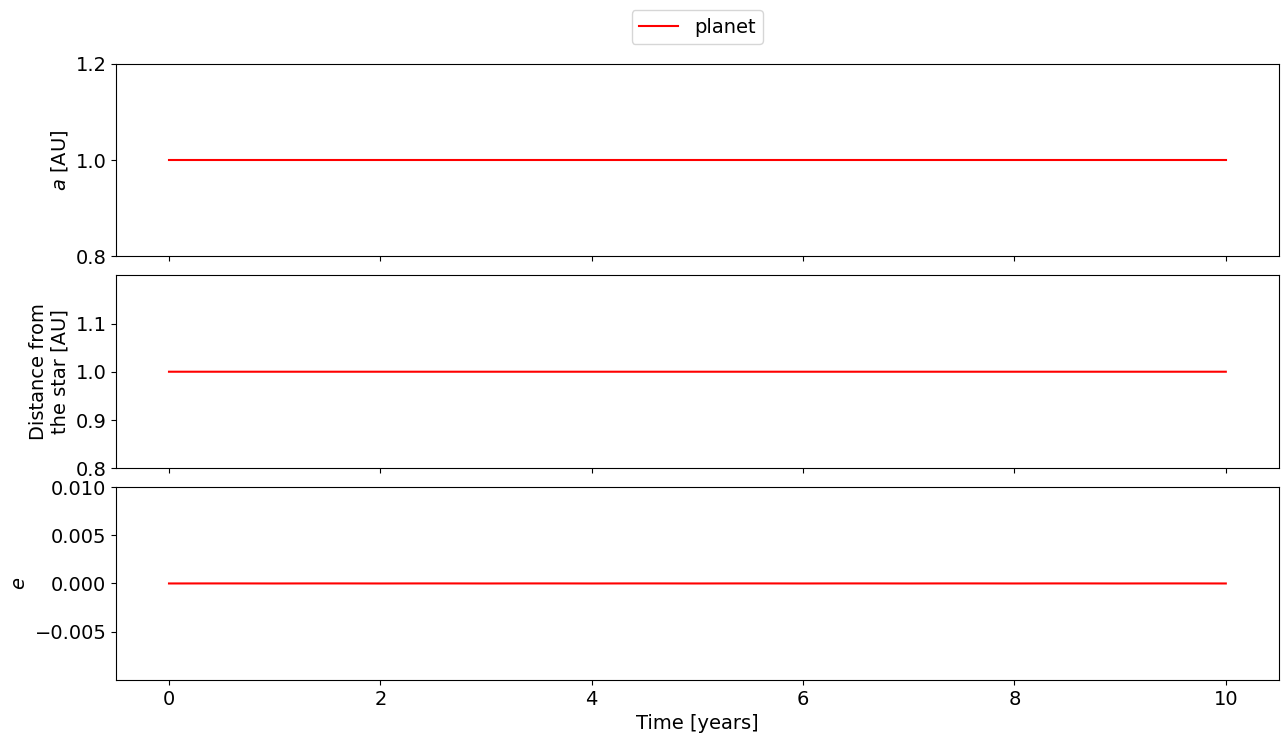

In [ ]:
movie = run_simulation(mysim,end_time=10) # run mysim for 10 years
movie # show the movie

<font color=green>There are some things you should notice that may be helpful in the next steps.</font>

First, while the simulation was running, you should have seen a progress bar with some numbers off to the side. The progress bar is to help you see the status of your simulation.  For very short simulations, the simulation may run too fast for the progress bar to show up. The meaning of the numbers are shown in the picture below.  In particular, the "% Done" and "Time Remaining" numbers are quite useful.

<img src="https://github.com/astro-datalab/notebooks-latest/blob/master/06_EPO/e-TeenAstronomyCafe/08_Breaking_the_Solar_System/Figures/progress.jpeg?raw=1" style="width: 600px;">

Second, you have a movie to play with that shows a "top down" view of our planetary system.  The controls of the movie are shown in the picture below.

<img src="https://github.com/astro-datalab/notebooks-latest/blob/master/06_EPO/e-TeenAstronomyCafe/08_Breaking_the_Solar_System/Figures/movie.jpeg?raw=1" style="width: 500px;">

Sometimes the movies may appear to run backward or stay stationary.  This is called the ["wagon wheel effect"](https://en.wikipedia.org/wiki/Wagon-wheel_effect).  If the planet appears to stay still, the frames in the movie are being output once every time the planet goes around the star an integer number of times.  If the planet appears to move backward, the frames are being output when the planet goes around more than once but less than twice (or an integer multiple of that) between frames.

<font color=green>**Before we go any further**</font>, know that we can put all of the code into one cell to make things simpler. An example is shown below. <font color=red> You do _not_ need to run this code.</font>

In [ ]:
# Create simulation
mysim = initialize_simulation()

# Add a star
add_star(mysim, name='Sun', mass=1.0)

# Add some planets
add_planet(mysim, name='big planet', mass=1, a=1) # a Jupiter at 1 AU
add_planet(mysim, name='small planet', mass=1/300, a=5, e=0.2, i=10, omega=180, Omega=90, f=143) # an eccentric Earth at 5 AU

# Run the simulation and show the movie
movie = run_simulation(mysim,end_time=100)
movie

____
# Activity 2: Simulate the Solar System

**Add the Sun and the giant planets to the simulation below and run it for 100 years.**

The orbital elements for the Solar System are in your worksheet.

Progress:   0%|          | 0/10 [00:00<?, ?it/s]

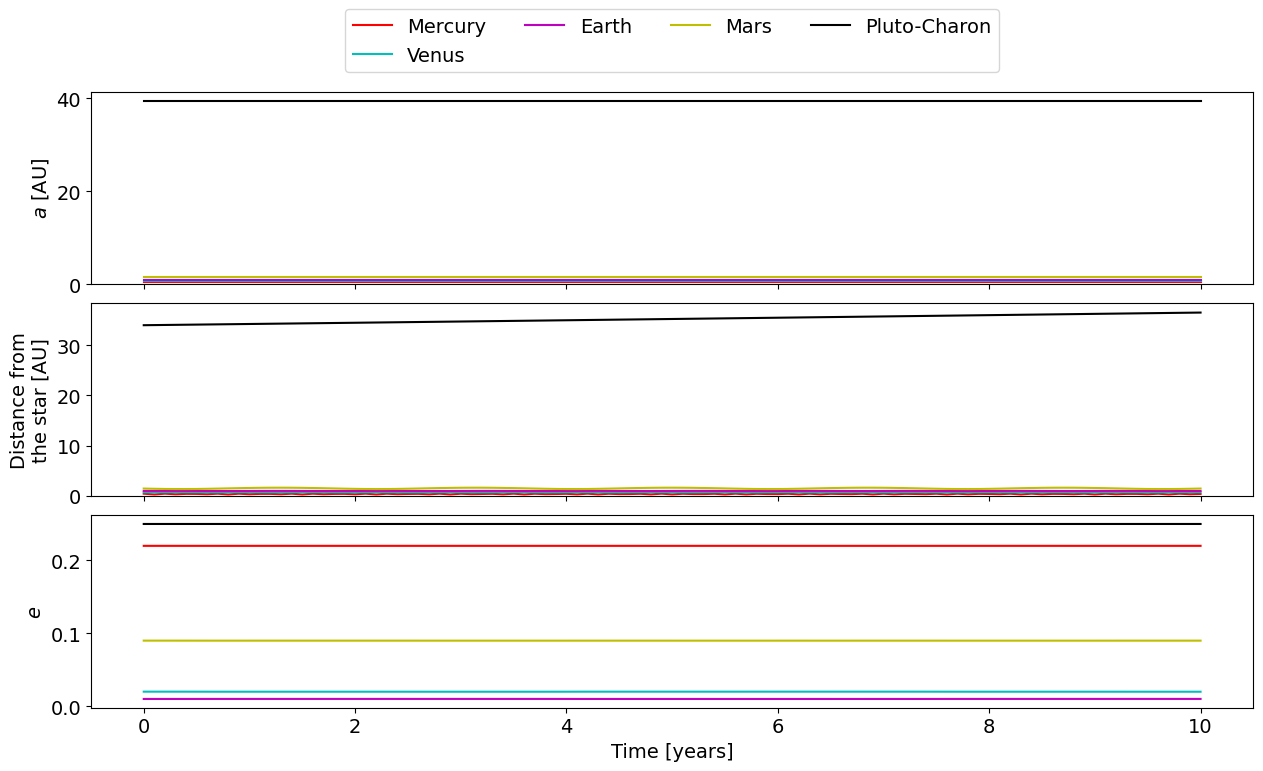

In [ ]:
# Initialize the simulation
mysim = initialize_simulation()

# Add the Sun here
add_star(mysim, name='Sun', mass=1.0)

# The inner terrestrial planets
add_planet(mysim, name='Mercury', mass=0.00017, a=0.38, e=0.22, i=7.1, omega=30,  Omega=48,  f=201)
add_planet(mysim, name='Venus',   mass=0.0026,  a=0.74, e=0.02, i=3.4, omega=91,  Omega=7,   f=347)
add_planet(mysim, name='Earth',   mass=0.0031,  a=1.00, e=0.01, i=0.0, omega=335, Omega=133, f=86)
add_planet(mysim, name='Mars',    mass=0.00034, a=1.51, e=0.09, i=1.9, omega=292, Omega=49,  f=281)

# Add the giant planets here


# Pluto-Charon, just for fun. :)
add_planet(mysim, name='Pluto-Charon', mass=0.000007, a=39.5, e=0.25, i=17.1, omega=114, Omega=110, f=69)

# Run the simulation
movie = run_simulation(mysim, end_time=10)
movie


You might have noticed that this simulation took a long time to run compared to the simulations we ran earlier. There are three big things that impact the time you have to twiddle your thumbs when running simulations like these:
1. The finishing time of the simulation (obviously).
2. The number of bodies in the simulation. Each step requires $N^2$ calculations, so for a two planet system, there are four calculations required (the star on each planet and each planet on each other) and for an eight planet system, like the Solar System, there are 256.  Fewer planets means a faster simulation.
3. The distance of the closest planet to the star.  Because we're approximating the orbits between timesteps, we have to take smaller steps to get a good approximation if there is a close in planet. For instance, if we put Mercury in our simulation, one year requires 83 simulation steps, but if Jupiter is the closest planet to the Sun, one year requires 2 simulation steps. A more distant inner planet means a faster simulation.

___
# Activity 3: Simulate SgrA*

The supermassive black hole at the center of our galaxy, SgrA*, has stars orbiting it just like planets. Knowing the mass of the black hole, let's try to replicate the Nobel Prize-winning observations of its orbiting stars and find out the size of the orbits!

In [ ]:
# Parameter being tested:

# Add your simulation below
# Initialize the simulation
mysim = initialize_simulation()

# Add SgrA* here
add_star(mysim, name='Sgr A*', mass=4E6)

# The orbiting stars
add_planet(mysim, name='Star 1', mass=1, a=1, e=0.1, i=7.1, omega=30,  Omega=48,  f=201)
# Add some more here...

# Run the simulation for 20 years
movie = run_simulation(mysim, end_time=20)
movie


_**Adapted from Rachel Smullen and Christine O'Donnell.**_